<a href="https://colab.research.google.com/github/oishigyunyu/deep-learning-from-zero_with-cupy/blob/master/zero_dep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 446, done.
remote: Total 446 (delta 0), reused 0 (delta 0), pack-reused 446
Receiving objects: 100% (446/446), 5.52 MiB | 30.36 MiB/s, done.
Resolving deltas: 100% (232/232), done.


# 3 ニューラルネットワーク

### **3.2.3 ステップ関数のグラフ**

$f(x)=\left\{
  \begin{array}{}
  1 & (x \geq 0 )\\
  0 & (x \lt 0 )
  \end{array}
  \right.
$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("hello wold")

hello wold


In [4]:
def step_function(x):
  return np.array(x > 0, dtype=np.int)

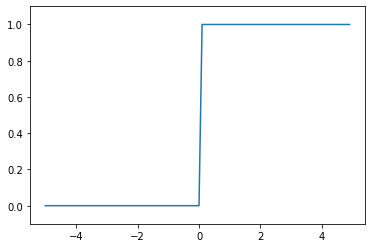

In [5]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### **3.2.4シグモイド関数の実装**

$f(x)= \displaystyle\frac{1}{1+exp(-x)}
$

In [6]:
def sigmoid(x):
  return 1 /  (1 + np.exp(-x))

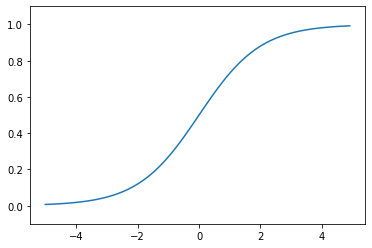

In [7]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### **3.2.7ReLU関数(Rectified Linear Unit)**

$f(x)=\left\{
  \begin{array}{}
  x & (x \geq 0 )\\
  0 & (x \lt 0 )
  \end{array}
  \right.
$

In [8]:
def relu(x):
  return np.maximum(0, x)

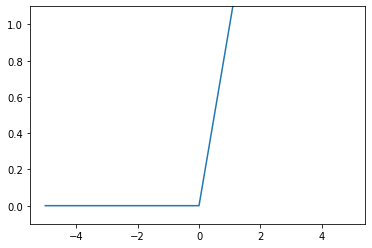

In [9]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## **3.4 3層ニューラルネットワークの実装**

恒等関数

In [10]:
def identity_function(x):
  return x

ネットワークの重みとバイアスの初期化

In [11]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

順伝搬処理

In [12]:
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

In [13]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## **3.5出力層の設計**

### **3.5.1恒等関数とソフトマックス関数**

$y_k=\displaystyle\frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$

In [14]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [15]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [16]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [17]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [18]:
a = np.array([1010, 1000, 900])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

このままではオーバーフローするので、**akの中の最大値を引き算**してから計算することでオーバーフローが防げる

In [19]:
c = np.max(a)
a - c

array([   0,  -10, -110])

In [20]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

softmaxは**出力が0から1の間になり、総和は1**になる。  
このことから、**出力を確率**としてみることができる。  
softmaxを用いることで問題に対して**確率的な対応ができる**ようになる

In [21]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

## **3.6手書き数字認識**

### 3.6.1 MNISTデータセット

In [22]:
!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch/master/dataset/mnist.py

--2020-11-22 01:00:14--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch/master/dataset/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3495 (3.4K) [text/plain]
Saving to: ‘mnist.py’

mnist.py            100%[===================>]   3.41K  --.-KB/s    in 0s      

2020-11-22 01:00:14 (49.9 MB/s) - ‘mnist.py’ saved [3495/3495]



In [23]:
import sys, os
#sys.path.append("/content/drive/My Drive/Google_Colab/deep-learning-from-zero_with-cupy")
from mnist import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist(flatten = True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [24]:
from PIL import Image
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

In [25]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


### 3.6.2 ニューラルネットワークの推論処理

In [26]:
def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
  return x_test, t_test

In [27]:
!wget https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl

--2020-11-22 01:00:17--  https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sample_weight.pkl’

sample_weight.pkl       [ <=>                ]  92.17K  --.-KB/s    in 0.02s   

2020-11-22 01:00:17 (4.41 MB/s) - ‘sample_weight.pkl’ saved [94384]



In [28]:
!ls

deep-learning-from-scratch  sample_weight.pkl
mnist.pkl		    t10k-images-idx3-ubyte.gz
mnist.py		    t10k-labels-idx1-ubyte.gz
__pycache__		    train-images-idx3-ubyte.gz
sample_data		    train-labels-idx1-ubyte.gz


In [29]:
import pickle
def init_network():
  with open("./deep-learning-from-scratch/ch03/sample_weight.pkl",  "rb") as f:
    network = pickle.load(f)

  return network

In [30]:
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [31]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if(p == t[i]):
    accuracy_cnt += 1
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


データを0.0~1.0に収めることを**正規化**という  
NNの入力データに対して何らかの決まった変換を**前処理**という  
それ以外にも**白色化(Whitening)**などの前処理がある

### 3.6.3 バッチ処理

1バッチ分の処理の時のshape  
&emsp;X &emsp;&emsp;&emsp;W1 &emsp;&emsp; W2 &emsp;&emsp;  W3 &emsp; → &emsp;Y  
784&emsp;784x50&emsp;50x100&emsp;100x10&emsp;&emsp;&emsp;10

100バッチ分の処理の時のshape  
&emsp;X &emsp;&emsp;&emsp;&emsp;W1 &emsp;&emsp; W2 &emsp;&emsp;  W3 &emsp;&emsp; → &emsp;&emsp;Y  
**100**x784&emsp;784x50&emsp;50x100&emsp;100x10&emsp;&emsp;&emsp;**100**x10

バッチ処理の実装

In [32]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


## 3.7 まとめ  


*   NNは活性化関数に**sigmoidやsoftmax**を使って**滑らかに変化**させる  
*   numpyの多次元配列でNNを効率的に実装可能  
*   機械学習は、回帰問題と分類問題に区別できる  
*   出力総出の活性化関数は、**回帰問題は恒等関数、分類問題はソフトマックス関数**を一般的に用いる  
*   分類問題では、NNの出力層のニューロン数をクラス数に設定する  
*   入力データのまとまりをバッチと呼び、バッチ単位で推論処理を行うことにより高速に計算ができる。  



# 4 ニューラルネットワークの学習 

損失関数という指標の導入

## 4.1 データからの学習

### 4.1.1 データ駆動

認識アルゴリズムを作る手立てとしては**特徴量**を抽出というものがある。  
SIFT, SURF, HOG特徴量etc...  
画像データをベクトルに変換し、SVMやKNNなどで学習  
**特徴量は人が決める**  
ディープラーニングは特徴量までもを自分で見つけ出す  
end-to-end(入力から目的の出力を得る）  


### 4.1.2 訓練データとテストデータ  

モデルの汎化能力を正しく評価するために訓練データとテストデータを分割する  
あるデータセットだけに過度に対応した状態を**過学習**という

## 4.2 損失関数 

ニューラルネットワークでは**損失関数**という指標を用いる  
一般には二乗和誤差やクロスエントロピーが使われる  


### 4.2.1 二乗和誤差 

$E=\displaystyle\frac{1}{2}\sum_{k} (y_k-t_k)^2$

In [33]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [34]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

### 4.2.2 交差エントロピー誤差

$E=\displaystyle-\sum_{k} t_k\log y_k$

In [35]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [36]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 4.2.3　ミニバッチ学習  

訓練データすべてのクロスエントロピー誤差

$E=\displaystyle-\frac{1}{2}\sum_n\sum_k t_{nk}\log y_{nk}$

NこのデータをNでわって正規化→1個あたりの平均の損失関数を算出  
データセットがでかくなると全部の損失を求めるのは不可能  
データの一部を取り出して計算し、**全体の近似**として利用する→**ミニバッチ学習**  

In [37]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train.shape

(60000, 784)

In [38]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 [バッチ対応版]クロスエントロピー誤差の実装

In [39]:
def cross_entropy_error(y, t):
  if y.dim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7) / batch_size)

### 4.2.5 なぜ損失関数を設定するのか

認識精度が高いネットワークがほしい→認識精度を指標にしたほうがいいんじゃないの？  
ネットワーク学習ではパラメータ探索に、損失関数の値を小さくするパラメータを探す  
パラメータの微分を計算し、これを手がかりにする  

認識精度を指標にしてしまうと、パラメータの微分がほとんどの場所で0になってしまうから 

## 4.3 数値微分

勾配について、勾配の性質

### 4.3.1 微分

$\displaystyle\frac{df(x)}{dx}=\displaystyle\lim_{x \to 0}\frac{f(x+h)-f(x)}{h}$

悪い実装例

In [40]:
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h) - f(x)) / h

hが**丸め誤差で0.0**になってしまう  
「真の微分」はxの位置での傾き  
これだと**xとx+hの傾きに対応するため、厳密に一致しない**  
**hを無限に0へ近づけることが困難**なために生じる  

(x+h)と(x-h)での関数fの差分を計算し、誤差を軽減する**(中心差分)**  
xと(x+h)は**前方差分**

In [41]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 数値微分の例 

$y=0.01x^2+0.1x$

In [42]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

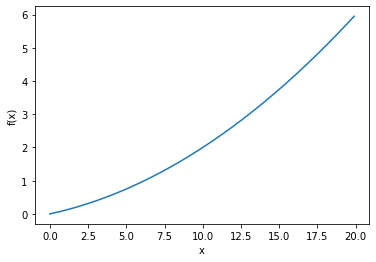

In [43]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [44]:
numerical_diff(function_1, 5)

0.1999999999990898

0.1999999999990898


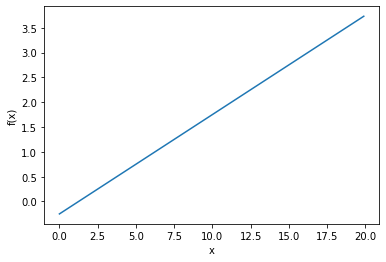

In [45]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y2)
plt.show()

### 4.3.3 偏微分

変数が2つある数式の微分  
$\displaystyle f(x_0,x_1)=x_0^2+x_1^2$

In [46]:
def function_2(x):
  return x[0]**2 + x[1]**2

$x_0=3, x_1=4$のときの$x_0$に対する偏微分$\frac{\partial_f}{\partial_{x_0}}$

In [47]:
def function_tmp1(x0):
  return x0*x0 + 4.00**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

$x_1$に対する偏微分

In [48]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4勾配

各変数の微分をまとめたもの：**勾配**  

In [49]:
def numerical_gradient(f, x):
  h =1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

In [50]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [51]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [52]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

$f(x_0, x_1)= {x_0}^2 + {x_1}^2$のこう配を描画する

In [53]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

In [54]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [55]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

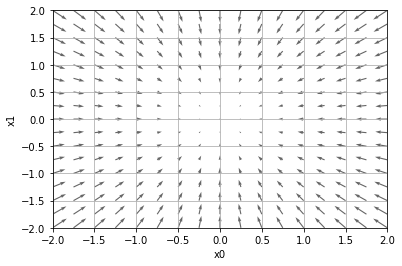

In [56]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

勾配は各地点において低くなる方向を指す  
勾配が示す方向：各場所において**関数の値を最も減らす方向**

### 4.4.1勾配法

一般に損失関数は複雑  
関数の極小値、極大値、**鞍点(saddle point)**では勾配は0  
関数が複雑で歪だと平らな土地(プラトー)に入り込み学習が停滞  

とにかく勾配を小さくする方に進みたい  
**勾配法(gradient method)**を用いる  


最小を探す場合:**勾配降下法**  
最大を探す場合:**勾配上昇法**

勾配法を数式で表現($\eta$は**学習率(learning rate)**)   
$\displaystyle x_0=x_0-\eta\frac{\partial{f}}{\partial{x_0}}$  
$\displaystyle x_1=x_1-\eta\frac{\partial{f}}{\partial{x_1}}$

勾配降下法の実装  
`f`は最適化したい関数、`init_x`は初期値、`lr`はlearning rate、`step_numは繰り返し数`

In [57]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
  return x

$f(x_0, x_1)= {x_0}^2 + {x_1}^2$の最小値を勾配法で求める

In [58]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [59]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

$f(x_0, x_1)= {x_0}^2 + {x_1}^2$の勾配法による更新のプロセス

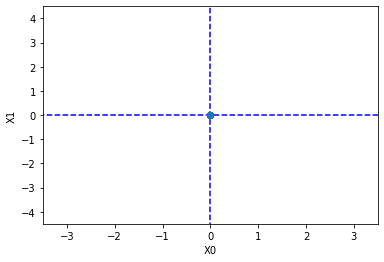

In [60]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)
    
lr=0.1
step_num=100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2ニューラルネットワークに対する勾配

$$ \bf{W} = \left(
    \begin{array}{ccc}
      w_{11} & w_{12} & w_{13} \\
      w_{21} & w_{22} & w_{23} \\
    \end{array}
  \right)$$  
$$ \frac{\partial L}{\partial \bf{W}} = \left(
    \begin{array}{ccc}
      \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
      \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \\
    \end{array}
  \right)$$  

かんたんなニューラルネットワークを例にして実際の勾配を求める

In [67]:
sys.path.append("./deep-learning-from-scratch")
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    return cross_entropy_error(z,y)

In [73]:
net = simpleNet()
print(net.W)

[[-0.67915988  0.57553788 -0.28745753]
 [ 0.9190202  -0.06030705 -0.60504564]]


In [74]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.41962225  0.29104638 -0.71701559]


In [75]:
np.argmax(p)

0

In [76]:
t = np.array([0, 0, 1])
net.loss(x,t )

0.8684001474478942

In [77]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[-1.42985713  0.          0.        ]
 [-2.14478571  0.          0.        ]]


lambda記法による書き方もできる

In [78]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5学習アルゴリズムの実装

**前提**  
重みとバイアスを訓練データに適合するように調整:「学習」  

**ステップ1**  
ミニバッチをくれんデータから取り出す  
ミニバッチの損失関数の値を減らす  
**ステップ2**  
各重みパラメータの勾配を求める  
勾配は損失関数の値を最も減らす方向を示す。 
**ステップ3**  
重みパラメータを勾配方向に微小分だけ更新する  
**ステップ4**  
ステップ1~3を繰り返す

### 4.5.12層ニューラルネットワークのクラス

かんたんな２層ネットワークの実装

In [82]:
from common.functions import * 
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size,
               weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std* \
                          np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)

    self.params['W2'] = weight_init_std* \
                          np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
  
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y 

  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x,t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [84]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [85]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2ミニバッチ学習の実装

TwoLayerNetクラスに対応できるミニバッチ学習ステップの実装

In [87]:
(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_late = 0.1

network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [88]:
for i in range(iters_num):
  print('iter: ', i)
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.numerical_gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_late*grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

iter:  0
iter:  1
iter:  2


KeyboardInterrupt: ignored

今のままではくれんデータに対する結果しか見れない  
このままでは過学習してもわからず、訓練データ以外の  
データにも対応できる汎化性を見ることができない  
なので以下の指標を追加する

In [90]:
train_acc_list = []
test_acc_list = []
iter_per_epoch= max(train_size/ batch_size, 1)
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [ ]:
for i in range(iters_num):
  print('iter: ', i)
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grad = network.numerical_gradient(x_batch, t_batch)

  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_late*grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test_acc | " + str(train_acc) ", "+ str(test_acc) )

## 4.6まとめ


*   機械学習のデータセットは訓練用とテスト用に分ける
*   訓練データで学習し、テストデータで汎化性をチェックする
*   ネットワークは損失関数が小さくなるそうに重みの値を小さくする  
*   重みパラメータの更新には勾配を利用して勾配方向に重みの値を更新する作業をくり返す  